# Project: Wrangling and Analyze Data

In [2]:
import numpy as np
import pandas as pd
import requests
# import tweepy
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
In the cell below, I gather three pieces of data for this project and load them in the notebook.
1. Directly download the WeRateDogs Twitter archive data

In [3]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
df_img = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API

In [5]:
open_tweet = open("tweet-json.txt","r")
df_tweet = pd.read_json(open_tweet, lines=True)

## Assessing Data
In this section, I detect and document **eight (8) quality issues and two (2) tidiness issue** wih **both** visual assessment
programmatic assessement.

* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

#### df_archive table

In [6]:
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
print("Number of duplicate values: " + \
      str(
        len(df_archive)-len(df_archive.drop_duplicates())
         )
     )

Number of duplicate values: 0


In [10]:
name_arc = df_archive['name'].unique().tolist()
name_arc.sort(reverse=True)
name_wrong = name_arc[:25]

In [11]:
stage_arc = df_archive[['doggo','floofer','pupper','puppo']].drop_duplicates()
stage_arc

,doggo,floofer,pupper,puppo
0,None,None,None,None
9,doggo,None,None,None
12,None,None,None,puppo
29,None,None,pupper,None
46,None,floofer,None,None
191,doggo,None,None,puppo
200,doggo,floofer,None,None
460,doggo,None,pupper,None


#### df_img table

In [12]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
print("Number of duplicate values: " + \
      str(
        len(df_img)-len(df_img.drop_duplicates())
         )
     )

Number of duplicate values: 0


#### df_tweet table

In [16]:
df_tweet.head()
# df_tweet.iloc[:5,15:25]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [17]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [17]:
df_tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [18]:
print("Number of duplicate values: " + \
      str(
        len(df_tweet['id'])-len(df_tweet['id'].drop_duplicates())
         )
     )

Number of duplicate values: 0


### Quality issues
#### df_archive
1. timestamp column type is object
2. contains 181 retweets records, which may lead to duplicate values
3. some records have more than one dog stage
4. erroneous dog names starting with lowercase characters
5. unnecessary html tags in source column

#### df_img
6. number of tweet_id in df_img table (2075) is smaller than that number of df_archive table (2356), which may cause missing value when joinning 2 tables
7. p1, p2, and p3 are inconsistent in a way capital and small letters are used in values

#### df_tweet
8. unnecessary html tags in source column
9. contains 179 retweets records, which may lead to duplicate values

### Tidiness issues
1. retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns in df_archive can be dropped (empty columns)
2. doggo, floofer, pupper and puppo columns in df_archive should be converted into one column named "stage"
3. geo, coordinates, place and contributors columns in df_tweet can be dropped (empty columns)
4. possibly_sensitive, possibly_sensitive_appealable in df_tweet can be dropped (meaningless values)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

### Make a copy of the original data before cleaning

In [19]:
df_archive_copy = df_archive.copy()
df_img_copy = df_img.copy()
df_tweet_copy = df_tweet.copy()

### Quality 1: Change timestamp colunm type to datetime
#### Define: 
Timestamp column in df_archive dataframe has object type, which need to be change to datetime type for later analysis
#### Code: 

In [77]:
df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])

C:\Users\anhnm28\AppData\Local\Temp\ipykernel_26620\187921099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_archive['timestamp'] = pd.to_datetime(df_archive['timestamp'])


#### Test: 

In [81]:
from pandas.api.types import is_datetime64_any_dtype
is_datetime64_any_dtype(df_archive['timestamp'])

True

### Quality 2 + 9: Delete the retweets records
#### Define: 
retweeted_status_id column of df_archive dataframe has 181 records which need to be removed and retweeted_status column of df_tweet dataframe has 179 records which need to be removed.

#### Code: 

In [86]:
df_archive = df_archive[df_archive['retweeted_status_id'].isna() == True]

In [85]:
df_tweet = df_tweet[df_tweet['retweeted_status'].isna() == True]

#### Test:

In [87]:
len(df_archive)

2175

In [89]:
len(df_tweet)

2175

In [90]:
df_tweet['retweeted'].drop_duplicates()

0    False
Name: retweeted, dtype: bool

### Quality 3 + Tidiness 2: Convert dog stage columns into one and fix cases which have more than one dog stage
#### Define: 
There are a few cases, where a dog has more than one stage, only one will be taken. I will keep older stage, follow this order: floofer, doggo, puppo, and pupper.
#### Code:

In [23]:
# Convert dog stage columns into one
df_archive_new = pd.melt(df_archive, id_vars=['tweet_id','source','timestamp','rating_numerator','rating_denominator','name'], \
        value_vars=['doggo','floofer','pupper','puppo'])
df_archive_new['stage'] = df_archive_new['value']

In [24]:
# fix cases which have more than one dog stage
## create a new column with custom sorting named sort_mapping
mapping = pd.DataFrame({
    'stage': ['floofer', 'doggo', 'puppo', 'pupper'],
    })
sort_mapping = mapping.reset_index().set_index('stage')
## create a new column named stage_num to the dataframe with mapped value from sort_mapping.
df_archive_new['stage_num'] = df_archive_new['stage'].map(sort_mapping['index'])
## sort values by the new column stage_num
df_archive_new = df_archive_new.sort_values(by=['tweet_id','stage_num'])
## remove tweet that have more than 1 stage
df_archive_final = df_archive_new.drop_duplicates(subset=['tweet_id'], keep='first').reset_index()

#### Test
Each tweet id will have 1 dog stage

In [91]:
df_archive_stage_count = df_archive_final.groupby('tweet_id')['stage'].count()
# find tweet id have more than 1 dog stage
df_archive_stage_count[df_archive_stage_count != 1]

Series([], Name: stage, dtype: int64)

### Quality 4: Dog name errors
Leave all name records without a valid name intact as not being able to provide them.

### Quality 5 + 8: Remove unnecessary html tag in source column
#### Define:
source column in df_archive and df_tweet dataframes has unnecessary html tags. This step can be skiped because source column have less meaning
#### Code:

In [25]:
df_archive_final['source_new'] = df_archive_final['source'].str.split('href=|>', expand=True)[1].str.replace('"', '')

In [26]:
df_tweet['source_new'] = df_tweet['source'].str.split('href=|>', expand=True)[1].str.replace('"', '')

C:\Users\anhnm28\AppData\Local\Temp\ipykernel_26620\3359637223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['source_new'] = df_tweet['source'].str.split('href=|>', expand=True)[1].str.replace('"', '')


#### Test:

In [73]:
df_archive_final['source_new']

0       http://twitter.com/download/iphone rel=nofollow
1       http://twitter.com/download/iphone rel=nofollow
2       http://twitter.com/download/iphone rel=nofollow
3       http://twitter.com/download/iphone rel=nofollow
4       http://twitter.com/download/iphone rel=nofollow
                             ...                       
2170    http://twitter.com/download/iphone rel=nofollow
2171    http://twitter.com/download/iphone rel=nofollow
2172    http://twitter.com/download/iphone rel=nofollow
2173    http://twitter.com/download/iphone rel=nofollow
2174    http://twitter.com/download/iphone rel=nofollow
Name: source_new, Length: 2175, dtype: object

In [74]:
df_tweet['source_new']

0       http://twitter.com/download/iphone rel=nofollow
1       http://twitter.com/download/iphone rel=nofollow
2       http://twitter.com/download/iphone rel=nofollow
3       http://twitter.com/download/iphone rel=nofollow
4       http://twitter.com/download/iphone rel=nofollow
                             ...                       
2349    http://twitter.com/download/iphone rel=nofollow
2350    http://twitter.com/download/iphone rel=nofollow
2351    http://twitter.com/download/iphone rel=nofollow
2352    http://twitter.com/download/iphone rel=nofollow
2353    http://twitter.com/download/iphone rel=nofollow
Name: source_new, Length: 2175, dtype: object

### Quality 7: Change p1-p3 columns into lowercase characters
#### Define:
p1, p2, and p3 columns in df_img dataframe need to be standardized in capital and small letters are used in values. I will put all letters in lowercase
#### Code:

In [27]:
img_list_col = ['p1','p2','p3']
for i in img_list_col:
    df_img[i] = df_img[i].str.lower()

#### Test:

In [76]:
df_img[['p1','p2','p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2070,basset,english_springer,german_short-haired_pointer
2071,paper_towel,labrador_retriever,spatula
2072,chihuahua,malamute,kelpie
2073,chihuahua,pekinese,papillon


### Quality 6: Keep only tweets that have images
#### Define:
merge df_img table (2075 records) and df_archive table (2356 records) to keep only tweets that have image
#### Code:

In [28]:
# inner join df_archive_final and df_img to sort tweets that have image
df_archive_img = df_archive_final.merge(df_img, how='inner', on = 'tweet_id')

# left join df_archive_img and df_tweet to get retweet count and favorite count columns
df = df_archive_img.merge(df_tweet, how='left', left_on = 'tweet_id', right_on='id')

#### Test:

In [92]:
len(df)

1994

### Tidiness 1 + 3 + 4: Remove not needed columns
#### Define:
keep only columns used for analysis
#### Code:

In [30]:
df_final = pd.concat([
        df[['tweet_id','timestamp','rating_numerator','rating_denominator','stage','name','jpg_url']],
        df.iloc[:,11:19],
        df.iloc[:,43:45]
        ]
    , axis=1
    )

#### Test:

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   int64         
 1   timestamp           1994 non-null   datetime64[ns]
 2   rating_numerator    1994 non-null   int64         
 3   rating_denominator  1994 non-null   int64         
 4   stage               1994 non-null   object        
 5   name                1994 non-null   object        
 6   jpg_url             1994 non-null   object        
 7   source_new_x        1994 non-null   object        
 8   jpg_url             1994 non-null   object        
 9   img_num             1994 non-null   int64         
 10  p1                  1994 non-null   object        
 11  p1_conf             1994 non-null   float64       
 12  p1_dog              1994 non-null   bool          
 13  p2                  1994 non-null   object      

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [32]:
df_final.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data

In [33]:
df_final.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,retweet_count,favorite_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1994.000000,1994.000000
mean,7.358508e+17,12.280843,10.532096,1.203109,0.593941,1.344195e-01,2766.753260,8895.725677
std,6.747816e+16,41.497718,7.320710,0.560777,0.271954,1.006807e-01,4674.698447,12213.193181
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,16.000000,81.000000
25%,6.758475e+17,10.000000,10.000000,1.000000,0.362857,5.393987e-02,624.750000,1982.000000
50%,7.084748e+17,11.000000,10.000000,1.000000,0.587635,1.174550e-01,1359.500000,4136.000000
75%,7.877873e+17,12.000000,10.000000,1.000000,0.846285,1.951377e-01,3220.000000,11308.000000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,79515.000000,132810.000000


### Most common dogs' stages

In [34]:
stage_count = df_final[df_final['stage'] != 'None'].groupby('stage')['tweet_id'].count().reset_index()
stage_count = stage_count.merge(sort_mapping,how='inner',on='stage').sort_values(by='index')

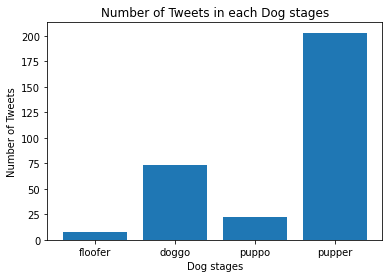

In [35]:
plt.bar(stage_count['stage'],stage_count['tweet_id'])
plt.xlabel("Dog stages")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets in each Dog stages")
plt.show()

### Most common dogs' names

In [36]:
name_count = df_final[(df_final['name'] != 'None') & (df_final['name'].isin(name_wrong) == False)].groupby('name')['tweet_id'].count().reset_index()
name_count = name_count.sort_values(by='tweet_id')
name_count_top11 = name_count.tail(11)
name_count_top11

,name,tweet_id
220,Daisy,7
522,Lola,7
851,Toby,7
899,Winston,8
735,Sadie,8
650,Penny,9
867,Tucker,9
534,Lucy,10
203,Cooper,10
625,Oliver,10


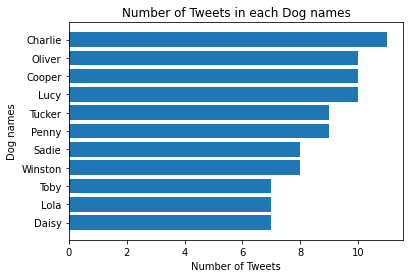

In [37]:
plt.barh(name_count_top11['name'],name_count_top11['tweet_id'])
plt.ylabel("Dog names")
plt.xlabel("Number of Tweets")
plt.title("Number of Tweets in each Dog names")
plt.show()

### Highest dogs' ratings, retweets and favorities count by dogs' stages

In [38]:
df_final['ratings'] = df_final['rating_numerator']/df_final['rating_denominator']
ratings_stage = df_final[df_final['stage'] != 'None'].groupby('stage')['ratings'].mean().reset_index()
ratings_stage = ratings_stage.merge(sort_mapping,how='inner',on='stage').sort_values(by='index')

In [39]:
retweet_stage = df_final[df_final['stage'] != 'None'].groupby('stage')['retweet_count'].mean().reset_index()
# retweet_stage

In [40]:
favorite_stage = df_final[df_final['stage'] != 'None'].groupby('stage')['favorite_count'].mean().reset_index()

In [41]:
retweet_favorite_stage = retweet_stage.merge(favorite_stage, how='inner', on='stage').merge(sort_mapping,how='inner',on='stage').sort_values(by='index')
retweet_favorite_stage

,stage,retweet_count,favorite_count,index
1,floofer,4776.750000,13701.375000,0
0,doggo,6915.972603,18905.397260,1
3,puppo,6473.954545,21582.090909,2
2,pupper,2363.581281,7197.738916,3


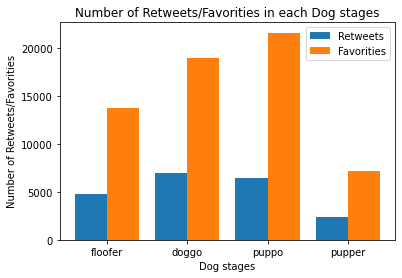

In [42]:
X = retweet_favorite_stage['stage']
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, retweet_favorite_stage['retweet_count'], 0.4, label = 'Retweets')
plt.bar(X_axis + 0.2, retweet_favorite_stage['favorite_count'], 0.4, label = 'Favorities')
  
plt.xticks(X_axis, X)
plt.xlabel("Dog stages")
plt.ylabel("Number of Retweets/Favorities")
plt.title("Number of Retweets/Favorities in each Dog stages")
plt.legend()
plt.show()

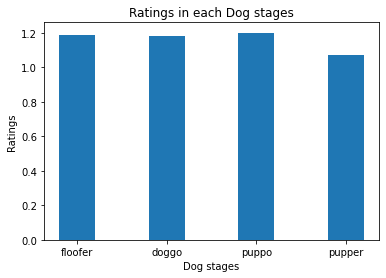

In [43]:
plt.bar(ratings_stage['stage'], ratings_stage['ratings'], 0.4, label = 'Retweets')
plt.xlabel("Dog stages")
plt.ylabel("Ratings")
plt.title("Ratings in each Dog stages")
plt.show()